In [1]:
%pwd

'/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy'

In [2]:
#Run the below code in your notebook to check the installed version
import pandas as pd
from pycaret.utils import version
version()
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
import shap
import matplotlib.pyplot as plt
from pycaret.classification import *
#%matplotlib inline

1.0.0


In [3]:
data=pd.read_csv('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/var150_DMS_valid_binary_normdata.csv',index_col=0)

In [4]:
data['binary'].value_counts()

DMS_valid    1802
Others       1754
Name: binary, dtype: int64

In [5]:
data.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,...,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_1_AAACCCAAGTCGTTAC,0.0,0.000000,0.0,1.147602,0.0,0.0,0.000000,0.000000,1.147602,0.0,...,2.262026,0.000000,0.0,2.901699,0.000000,0.0,1.667945,1.147602,1.147602,DMS_valid
pfc_1_AAAGGGCGTGGCATCC,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,3.364502,0.0,0.000000,0.000000,0.0,2.595888,1.411504,1.411504,Others
pfc_1_AACCCAATCCGCTTAC,0.0,1.034382,0.0,0.000000,0.0,0.0,1.034382,0.000000,0.000000,0.0,...,2.110634,0.000000,0.0,0.000000,0.000000,0.0,2.110634,0.000000,0.000000,Others
pfc_1_AAGAACAAGAGAGCCT,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.656318,0.0,...,1.656318,0.000000,0.0,0.000000,1.137830,0.0,1.656318,0.000000,0.000000,DMS_valid
pfc_1_ACAAGCTCAAAGCACG,0.0,0.818405,0.0,0.818405,0.0,0.0,0.000000,0.818405,1.262363,0.0,...,0.818405,0.000000,0.0,0.818405,0.818405,0.0,0.818405,0.000000,0.000000,DMS_valid


In [6]:
df=shuffle(data,random_state=20)
df.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,...,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_2_GACCGTGTCATGTCTT,0.0,0.0,0.000000,0.975321,0.0,0.000000,0.000000,1.459554,0.975321,0.0,...,2.029210,2.953462,0.0,0.0,3.477799,0.000000,2.029210,0.975321,2.654379,Others
pfc_3_CTACAGAGTAGGAGTC,0.0,0.0,0.000000,4.237145,0.0,0.000000,2.864242,1.974207,1.120690,0.0,...,1.635873,2.864242,0.0,0.0,2.427882,0.000000,3.587358,0.000000,0.000000,Others
pfc_4_GGTTAACAGAGAGGTA,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.890337,1.767631,0.000000,0.0,...,0.000000,2.820493,0.0,0.0,2.664213,0.000000,3.321912,0.000000,2.664213,Others
pfc_2_TAGCACAGTCCGGTCA,0.0,0.0,0.000000,0.000000,0.0,0.941346,0.941346,0.000000,0.000000,0.0,...,1.417516,0.000000,0.0,0.0,0.000000,0.000000,1.738760,0.941346,0.000000,DMS_valid
pfc_2_AGGTTGTAGGTCCTGC,0.0,0.0,0.919585,0.919585,0.0,0.919585,0.000000,0.000000,0.919585,0.0,...,1.390411,1.390411,0.0,0.0,0.000000,0.919585,0.919585,0.919585,1.709238,DMS_valid


In [41]:
df.to_csv('var150_DMS_valid_binary_normdata_shuffle.csv')

In [7]:
df=pd.read_csv('var150_DMS_valid_binary_normdata_shuffle.csv',index_col=0)

In [8]:
df['binary']=pd.factorize(df['binary'])[0]

In [9]:
df.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,...,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_2_GACCGTGTCATGTCTT,0.0,0.0,0.000000,0.975321,0.0,0.000000,0.000000,1.459554,0.975321,0.0,...,2.029210,2.953462,0.0,0.0,3.477799,0.000000,2.029210,0.975321,2.654379,0
pfc_3_CTACAGAGTAGGAGTC,0.0,0.0,0.000000,4.237145,0.0,0.000000,2.864242,1.974207,1.120690,0.0,...,1.635873,2.864242,0.0,0.0,2.427882,0.000000,3.587358,0.000000,0.000000,0
pfc_4_GGTTAACAGAGAGGTA,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.890337,1.767631,0.000000,0.0,...,0.000000,2.820493,0.0,0.0,2.664213,0.000000,3.321912,0.000000,2.664213,0
pfc_2_TAGCACAGTCCGGTCA,0.0,0.0,0.000000,0.000000,0.0,0.941346,0.941346,0.000000,0.000000,0.0,...,1.417516,0.000000,0.0,0.0,0.000000,0.000000,1.738760,0.941346,0.000000,1
pfc_2_AGGTTGTAGGTCCTGC,0.0,0.0,0.919585,0.919585,0.0,0.919585,0.000000,0.000000,0.919585,0.0,...,1.390411,1.390411,0.0,0.0,0.000000,0.919585,0.919585,0.919585,1.709238,1


In [10]:
exp1 = setup(df, target = 'binary',session_id=1)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3556, 151)"
4,Missing Values,False
5,Numeric Features,150
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8635,0.9175,0.9365,0.8194,0.8741,0.7264
1,0.8233,0.8969,0.8651,0.8015,0.8321,0.6462
2,0.8755,0.9254,0.9048,0.8571,0.8803,0.7508
3,0.8635,0.9284,0.9048,0.8382,0.8702,0.7266
4,0.8434,0.9050,0.9048,0.8085,0.8539,0.6862
5,0.8434,0.8933,0.8968,0.8129,0.8528,0.6863
6,0.8594,0.9079,0.9206,0.8227,0.8689,0.7184
7,0.8394,0.9119,0.8730,0.8209,0.8462,0.6784
8,0.8594,0.9169,0.9134,0.8286,0.8689,0.7182
9,0.8306,0.9008,0.8810,0.8043,0.8409,0.6607


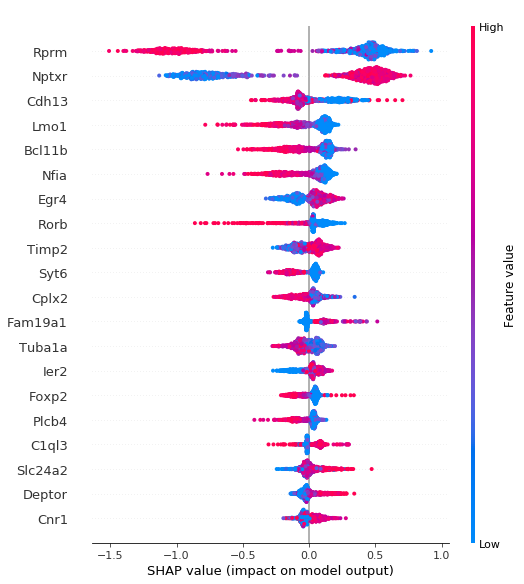

In [12]:
interpret_model(tuned_xgboost)

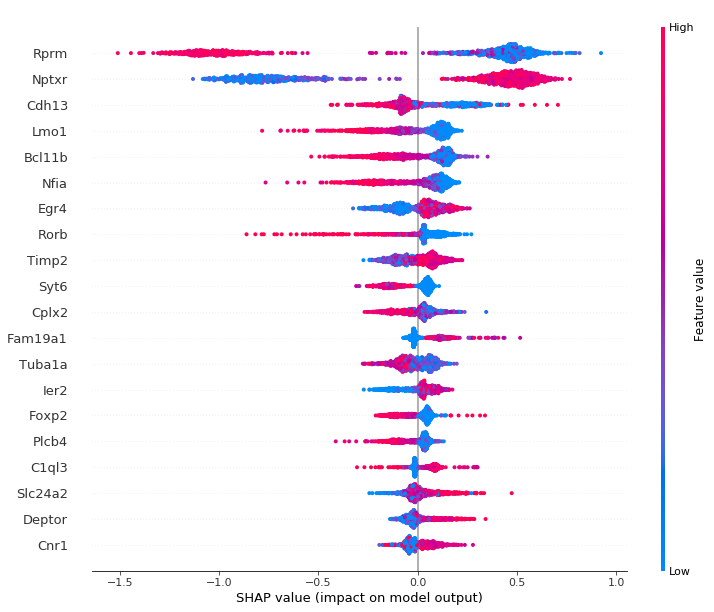

In [13]:
explainer = shap.TreeExplainer(tuned_xgboost)
shap_values = explainer.shap_values(exp1[3])
f = shap.summary_plot(shap_values, exp1[3],show=False)
f = plt.gcf()
f.set_size_inches(12, 10)
f.savefig('DMS shap plot seed.png', dpi=300)

ValueError: negative dimensions are not allowed

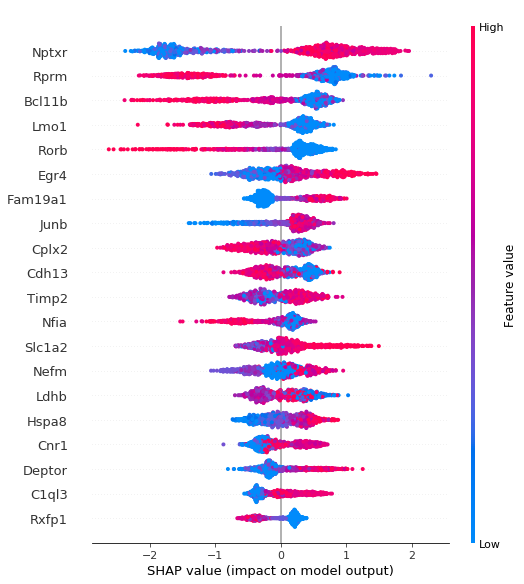

In [23]:
explainer = shap.TreeExplainer(tuned_xgboost)
shap_values = explainer.shap_values(exp1[3])
shap.summary_plot(shap_values, exp1[3],show=False)
plt.savefig('importance_scatter.pdf')

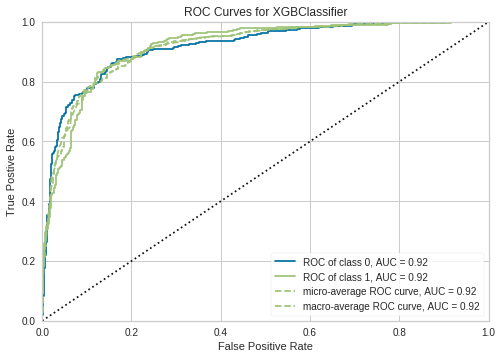

<Figure size 864x720 with 0 Axes>

In [16]:
plot_model(tuned_xgboost, plot = 'auc')
f = plt.gcf()
f.set_size_inches(12, 10)
f.savefig('test.png', dpi=300)

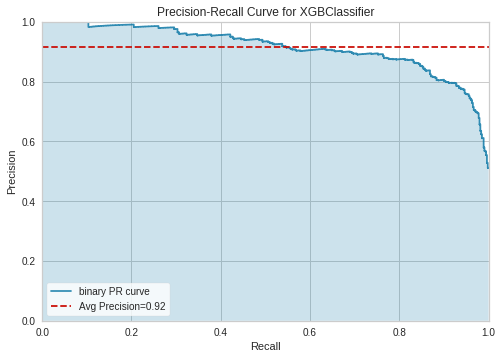

In [41]:
from yellowbrick.classifier import PrecisionRecallCurve
from IPython.display import display, HTML, clear_output, update_display
visualizer = PrecisionRecallCurve(tuned_xgboost, random_state=1)
visualizer.fit(exp1[2], exp1[4])
visualizer.score(exp1[3], exp1[5])
#clear_output()
#visualizer.poof()
visualizer.show(outpath="DMS var PR curve.pdf")

In [38]:
?ClassificationReport

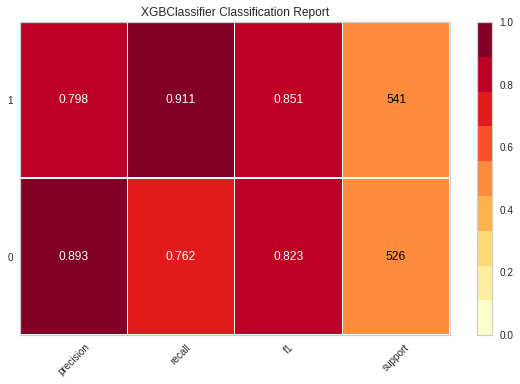

In [40]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(tuned_xgboost, random_state=1, support='count')
visualizer.fit(exp1[2], exp1[4])
visualizer.score(exp1[3], exp1[5])
clear_output()

visualizer.show(outpath="DMS var model classification report.pdf")

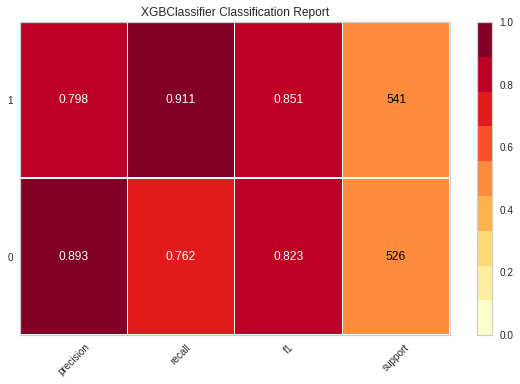

In [33]:
plot_model(tuned_xgboost, plot = 'class_report')

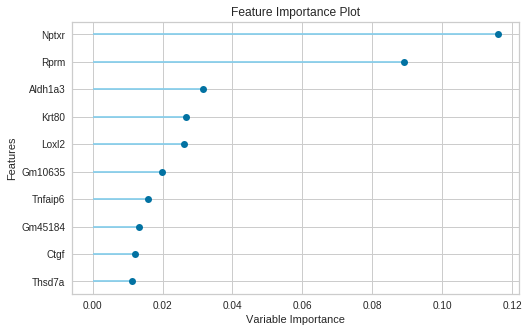

In [52]:
plot_model(tuned_xgboost,plot = 'feature')

In [233]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8482,0.8917,0.8066,0.7049,0.7523,0.6435


,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,...,Calm1,Klhl13,Fam83a,Serpine1,Gm17056,Ndrg1,Vstm2b,binary,Label,Score
0,0.000000,1.586067,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.339021,0.0,...,5.100775,0.000000,0.000000,0.0,0.000000,0.000000,1.821211,0,0,0.3078
1,0.000000,0.000000,0.000000,2.424604,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,4.871047,0.904666,0.000000,0.0,0.000000,0.000000,2.122924,0,0,0.3509
2,0.000000,4.526924,0.000000,3.844533,0.000000,0.0,0.000000,0.000000,2.363568,0.0,...,5.214650,0.000000,0.000000,0.0,2.106766,0.000000,2.363568,0,0,0.3100
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.119354,1.119354,0.0,...,5.737963,0.000000,0.000000,0.0,0.000000,0.000000,1.119354,0,1,0.6019
4,0.000000,2.370602,0.000000,1.920197,0.000000,0.0,0.000000,0.000000,1.920197,0.0,...,5.076067,0.000000,0.000000,0.0,1.585460,0.000000,0.000000,0,0,0.3218
5,0.000000,0.000000,0.000000,1.092569,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,5.342823,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,1,0.5136
6,0.000000,0.000000,0.000000,1.035810,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,5.157053,0.000000,0.000000,0.0,0.000000,1.864416,1.035810,0,0,0.3092
7,0.000000,0.000000,3.426853,0.000000,0.000000,0.0,1.884594,0.000000,0.000000,0.0,...,5.754309,0.000000,0.000000,0.0,1.051251,0.000000,1.051251,1,1,0.5519
8,0.890814,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.669843,0.000000,0.0,...,5.790646,0.000000,0.000000,0.0,0.000000,0.890814,0.000000,0,1,0.6423
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,5.040236,0.000000,0.000000,0.0,1.854138,0.000000,0.000000,0,0,0.3203


In [14]:
save_experiment('Experiment_DMS_19July2020')

Experiment Succesfully Saved


In [11]:
saved_experiment=load_experiment('Experiment_DMS_19July2020')


,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Tuned XGBClassifier
7,Tuned XGBClassifier Score Grid


In [15]:
y_training =saved_experiment[2]

In [19]:
type(X_training)

pandas.core.frame.DataFrame

In [234]:
final_xgboost = finalize_model(tuned_xgboost)

In [235]:
save_model(final_xgboost,'Final_DMS_27June2020')

Transformation Pipeline and Model Succesfully Saved


In [236]:
print(final_xgboost)

XGBClassifier(learning_rate=0.01, max_depth=90, min_child_weight=2,
              n_estimators=50, n_jobs=-1, random_state=7865, subsample=0.5,
              verbosity=0)


In [42]:
X = exp1[3]
y = exp1[5]

In [43]:
from sklearn.model_selection import train_test_split
from pycaret import preprocess
from sklearn import metrics

In [46]:
from sklearn.model_selection import train_test_split
from pycaret import preprocess
from sklearn import metrics

X = exp1[3]
y = exp1[5]

# Number of random trials
NUM_TRIALS = 10
d = []
for i in range(NUM_TRIALS):
    
    X_train, X_test, y_train, y_test  = train_test_split(X, y,stratify=y, test_size=0.9,  random_state=i)
    pred_ =tuned_xgboost.predict(X_test)
    pred_prob = tuned_xgboost.predict_proba(X_test)[:,1]
    acc = metrics.accuracy_score(y_test,pred_)
    auc = metrics.roc_auc_score(y_test,pred_prob)
    prec = metrics.precision_score(y_test,pred_)
    f1 = metrics.f1_score(y_test,pred_)
    recall = metrics.recall_score(y_test,pred_)
    kappa = metrics.cohen_kappa_score(y_test,pred_)
    d.append(
        {
           'Accuracy' : acc, 'AUC': auc, 'F1' : f1, 'Precision':prec, 'Recall':recall, 'Kappa':kappa
        }
    )
    model_results=pd.DataFrame(d)


In [47]:
model_results

,AUC,Accuracy,F1,Kappa,Precision,Recall
0,0.918934,0.839750,0.852772,0.678791,0.797853,0.915811
1,0.913303,0.830385,0.843720,0.660047,0.791367,0.903491
2,0.916963,0.836629,0.849761,0.672543,0.795699,0.911704
3,0.915837,0.834547,0.847847,0.668371,0.793907,0.909651
4,0.916366,0.840791,0.852743,0.680939,0.802536,0.909651
5,0.919580,0.839750,0.852772,0.678791,0.797853,0.915811
6,0.921833,0.844953,0.856316,0.689298,0.807273,0.911704
7,0.923041,0.843913,0.855769,0.687187,0.804702,0.913758
8,0.919927,0.843913,0.855769,0.687187,0.804702,0.913758
9,0.912497,0.833507,0.846449,0.666314,0.794595,0.905544
